<a href="https://colab.research.google.com/github/suganya27302/Deep-learning/blob/main/Gesture_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = "suganyan" # username from the json file
os.environ['KAGGLE_KEY'] = "f50fb1f26277b3568156e21e6ce3287b" # key from the json file

In [ ]:
!kaggle datasets download -d "gti-upm/leapgestrecog"

100% 2.12G/2.13G [00:15<00:00, 80.1MB/s]
100% 2.13G/2.13G [00:15<00:00, 145MB/s] 


In [ ]:
!unzip /content/leapgestrecog.zip

Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0012.png  
  inflating: leapgestrecog/leapGestRe

In [ ]:
import numpy as np # We'll be storing our data as numpy arrays
import os # For handling directories
from PIL import Image # For handling the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Plotting

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/leapGestRecog",target_size=(384,384))


Found 20000 images belonging to 10 classes.


In [ ]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('/content/leapGestRecog/00'):
    if not j.startswith('.'): # If running this code locally, this is to 
                              # ensure you aren't reading in hidden folders
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup


{'01_palm': 0,
 '02_l': 8,
 '03_fist': 7,
 '04_fist_moved': 9,
 '05_thumb': 3,
 '06_index': 1,
 '07_ok': 4,
 '08_palm_moved': 2,
 '09_c': 5,
 '10_down': 6}

In [ ]:
x_data = []
y_data = []
datacount = 0 # We'll use this to tally how many images are in our dataset
for i in range(0, 10): # Loop over the ten top-level folders
    for j in os.listdir('/content/leapgestrecog/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'): # Again avoid hidden folders
            count = 0 # To tally images of a given gesture
            for k in os.listdir('/content/leapgestrecog/leapGestRecog/0' + 
                                str(i) + '/' + j + '/'):
                                # Loop over the images
                img = Image.open('/content/leapgestrecog/leapGestRecog/0' + 
                                 str(i) + '/' + j + '/' + k).convert('L')
                                # Read in and convert to greyscale
                img = img.resize((320, 120))
                arr = np.array(img)
                x_data.append(arr) 
                count = count + 1
            y_values = np.full((count, 1), lookup[j]) 
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1) # Reshape

In [ ]:
x_data 

array([[[ 6.,  7.,  6., ...,  5.,  5.,  5.],
        [ 5.,  6.,  6., ...,  5.,  5.,  5.],
        [ 5.,  5.,  6., ...,  5.,  5.,  5.],
        ...,
        [ 5.,  6.,  5., ...,  6.,  6.,  6.],
        [ 5.,  5.,  5., ...,  4.,  6.,  5.],
        [ 5.,  5.,  5., ..., 31., 10., 11.]],

       [[ 6.,  6.,  5., ...,  6.,  5.,  5.],
        [ 5.,  5.,  5., ...,  5.,  5.,  4.],
        [ 5.,  6.,  6., ...,  4.,  5.,  5.],
        ...,
        [ 5.,  6.,  6., ...,  5.,  6.,  5.],
        [ 6.,  6.,  6., ...,  4.,  5.,  5.],
        [ 6.,  6.,  6., ..., 29.,  9., 10.]],

       [[ 6.,  6.,  6., ...,  5.,  5.,  5.],
        [ 5.,  5.,  6., ...,  5.,  5.,  4.],
        [ 6.,  5.,  6., ...,  4.,  5.,  5.],
        ...,
        [ 6.,  6.,  7., ...,  6.,  6.,  6.],
        [ 7.,  6.,  7., ...,  4.,  7.,  6.],
        [ 7.,  6.,  7., ..., 28.,  7., 11.]],

       ...,

       [[ 6.,  5.,  5., ...,  4.,  5.,  5.],
        [ 5.,  6.,  5., ...,  4.,  4.,  4.],
        [ 5.,  5.,  5., ...,  3.,  3.,  4.

In [ ]:
y_data

array([[0],
       [0],
       [0],
       ...,
       [9],
       [9],
       [9]])

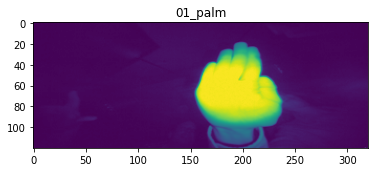

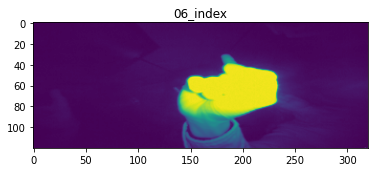

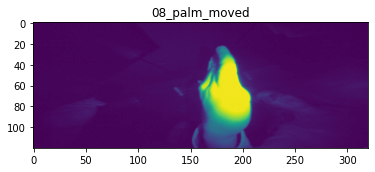

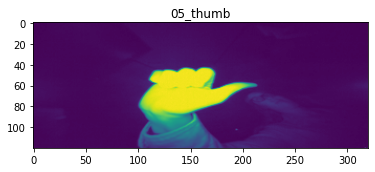

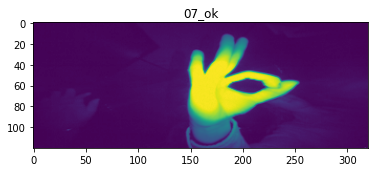

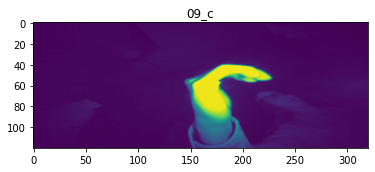

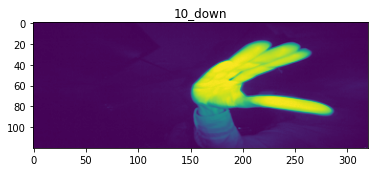

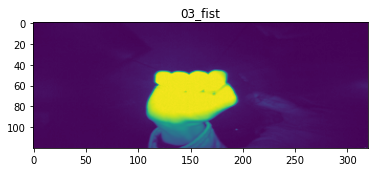

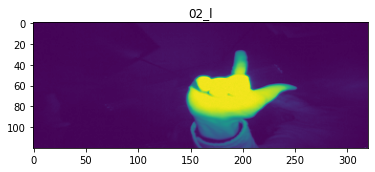

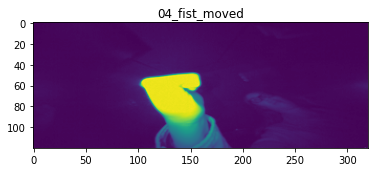

In [ ]:
from random import randint
for i in range(0, 10):
    plt.imshow(x_data[i*200 , :, :])
    plt.title(reverselookup[y_data[i*200 ,0]])
    plt.show()

In [ ]:
import keras
from keras.utils import to_categorical
y_data = to_categorical(y_data)

In [ ]:
x_data = x_data.reshape((datacount, 120, 320, 1))
x_data /= 255


In [ ]:
x_data

array([[[[0.02352941],
         [0.02745098],
         [0.02352941],
         ...,
         [0.01960784],
         [0.01960784],
         [0.01960784]],

        [[0.01960784],
         [0.02352941],
         [0.02352941],
         ...,
         [0.01960784],
         [0.01960784],
         [0.01960784]],

        [[0.01960784],
         [0.01960784],
         [0.02352941],
         ...,
         [0.01960784],
         [0.01960784],
         [0.01960784]],

        ...,

        [[0.01960784],
         [0.02352941],
         [0.01960784],
         ...,
         [0.02352941],
         [0.02352941],
         [0.02352941]],

        [[0.01960784],
         [0.01960784],
         [0.01960784],
         ...,
         [0.01568628],
         [0.02352941],
         [0.01960784]],

        [[0.01960784],
         [0.01960784],
         [0.01960784],
         ...,
         [0.12156863],
         [0.03921569],
         [0.04313726]]],


       [[[0.02352941],
         [0.02352941],
         [0.01

In [ ]:
y_data

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [ ]:
from keras import layers
from keras import models

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 158, 32)       832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 79, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 77, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 38, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 36, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 18, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 5760)              0

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
hist=model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))


Epoch 1/10
250/250 [==============================] - 189s 753ms/step - loss: 0.8113 - accuracy: 0.7262 - val_loss: 0.0139 - val_accuracy: 0.9980
Epoch 2/10
250/250 [==============================] - 188s 754ms/step - loss: 0.0183 - accuracy: 0.9951 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 3/10
250/250 [==============================] - 188s 753ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 5.3131e-04 - val_accuracy: 0.9995
Epoch 4/10
250/250 [==============================] - 188s 754ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 5.8785e-04 - val_accuracy: 0.9995
Epoch 5/10
250/250 [==============================] - 188s 754ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0018 - val_accuracy: 0.9995
Epoch 6/10
250/250 [==============================] - 190s 760ms/step - loss: 2.8168e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 0.9995
Epoch 7/10
250/250 [==============================] - 189s 758ms/step - loss: 9.4040e-04 - accuracy: 0.9999 - va

In [ ]:
model.save('GestureNet.h5')

In [ ]:
prediction = model.predict(x_test)

In [ ]:
np.argmax(prediction[0]), y_test[0]

(6, array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32))

In [ ]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

63/63 [==============================] - 6s 91ms/step - loss: 0.0072 - accuracy: 0.9995
Accuracy:0.9994999766349792


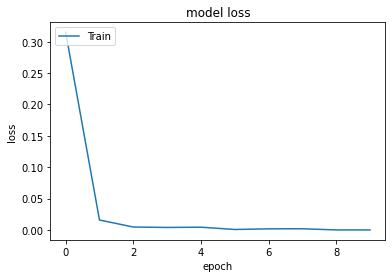

In [ ]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'],loc='upper left')
plt.show()